# Import libraries

In [1]:
# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image

# General libraries
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

# Building Object Detector

In [ ]:
# Import Object detector model
from Object_detector.Building_detector import*

PATH_TO_MODEL= "path/Object_dectector/detect.tflite"
PATH_TO_LABELS='path/Object_dectector/labelmap.txt'   # Path to labelmap.txt file
min_conf_threshold=0.5    # Confidence threshold (try changing this to 0.01 if you don't see any detection results)

In [ ]:
path = "path/"
IMG_ID = "327738.jpg"
savepath="saved_path"
building_detector(PATH_TO_MODEL, path+"/"+IMG_ID, PATH_TO_LABELS, min_conf_threshold, savepath)

# Lateral Load Resisting System Model

In [2]:
# Model
model = tf.keras.models.load_model("Path/Structural_System")

# Construction Period Model

In [3]:
# Model
model_CP = tf.keras.models.load_model("Path/Construction_Period")

# Keypoints Model

In [ ]:
from ultralytics import YOLO
from N_Stories_Model.Keypoints_detection.Perspective_Correction import *
# Keypoints model data
keypoint_model_path_2 = "Path/Keypoints_model/last_vf.pt"
model_2 = YOLO(keypoint_model_path_2)

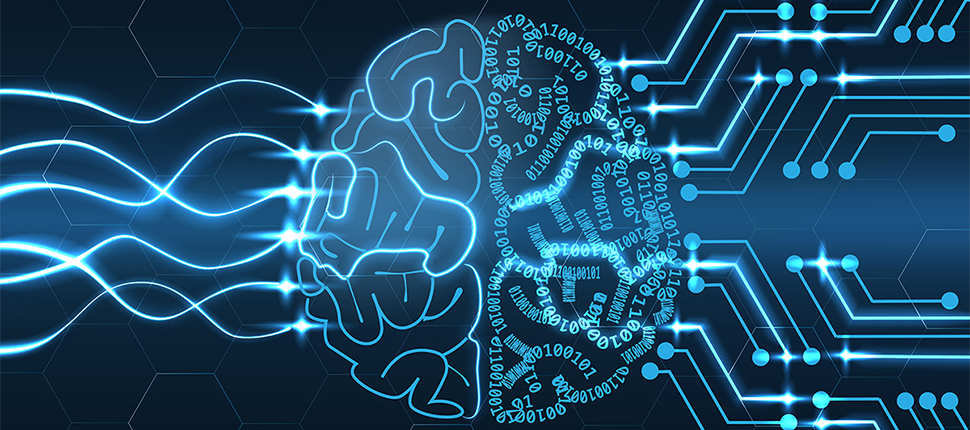

1/1 [==============================] - 0s 282ms/step


,Thin Wall,Masonry,Moment Frame,Dual System
0,0.0,0.0,100.0,0.0


Lateral Load Resisting System: Moment Frame
1/1 [==============================] - 0s 297ms/step


,Code - (Post 1984),Pre Code - (Pre 1984)
0,0.16,99.839996


Building construction period: Pre Code - (Pre 1984)


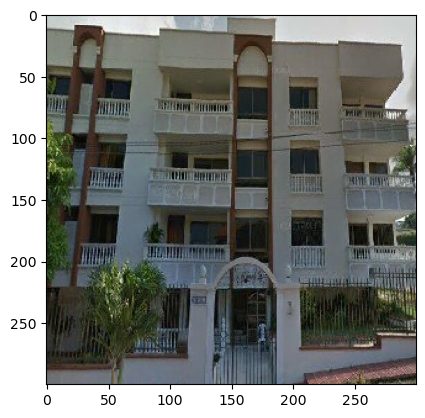

In [26]:
path = "path"
IMG_ID = "236441.jpg"
savepath="saved_path"
#building_detector(PATH_TO_MODEL, path+"/"+IMG_ID, PATH_TO_LABELS, min_conf_threshold, savepath)

# Upload cropped image
img = image.load_img(savepath+"/"+IMG_ID, target_size = [300,300])
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)


pred_class = model.predict(img_data)
a = int(np.argmax(pred_class, axis = 1))
story_labels = ["Thin Wall", "Masonry", "Moment Frame", "Dual System"]
story = story_labels[a]
tab = pd.DataFrame(np.round(pred_class[0],4)*100)
tab = tab.transpose()
tab.columns = ["Thin Wall", "Masonry", "Moment Frame", "Dual System"]
display(tab)
print("Lateral Load Resisting System:",story)

# Upload cropped image
img = image.load_img(savepath+"/"+IMG_ID, target_size = [300,300])

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)

pred_class = model_CP.predict(img_data)
a = int(np.argmax(pred_class, axis = 1))
story_labels = ["Code - (Post 1984)", "Pre Code - (Pre 1984)"]
story = story_labels[a]
tab = pd.DataFrame(np.round(pred_class[0],4)*100)
tab = tab.transpose()
tab.columns = ["Code - (Post 1984)", "Pre Code - (Pre 1984)"]
display(tab)
print("Building construction period:",story)